This project work consists of two main parts: Explanatory Data Analysis & Data Preparation and Constructing the Models.

In the Explanatory Data Analysis & Data Preparation part, we analyzed data we had, checked the normality of their distribution and transform them in the case of non normality. Then, we applied scaling for numerical data and to categorical data we assigned dummies.

In the last part, we splitted the data to train and test sets and we applied different regression models. The best result was given by Gradient Boosting Model.

In [23]:
import numpy as np
import pandas as pd

In [24]:
#import the model
df = pd.read_csv("model.csv")
df.columns

Index(['age_days', 'n_tokens_title', 'n_tokens_review', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'product_category', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'likes'],
      dtype='object')

In [25]:
df.describe()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
count,28000.000000,28000.000000,28000.000000,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,360.376286,10.379679,559.612036,0.547309,1.000000e+00,0.693451,11.229857,3.382214,4.558214,1.261143,...,1.146792,2.318526,-12.252049,-12.473952,-19.020554,11.086373,1.648656,5.542759,7.670698,3408.232750
std,212.558887,2.106580,464.024465,0.102457,4.057927e-09,0.101096,11.424556,3.812180,8.275950,4.214034,...,19.518382,23.934590,60.885271,85.453870,45.202003,74.545257,51.154457,37.231012,50.602914,12578.941208
min,8.000000,2.000000,18.000000,0.123422,9.999999e-01,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-875.000000,-875.000000,-875.000000,0.000000,-875.000000,0.000000,0.000000,5.000000
25%,175.000000,9.000000,258.000000,0.477454,1.000000e+00,0.632627,5.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.347396,-0.800000,-0.200000,0.000000,0.000000,0.166667,0.000000,942.000000
50%,348.000000,10.000000,420.000000,0.543549,1.000000e+00,0.693603,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.264583,-0.500000,-0.100000,0.166667,0.000000,0.500000,0.000000,1400.000000
75%,547.000000,12.000000,728.000000,0.611805,1.000000e+00,0.757404,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.200000,-0.333333,-0.050000,0.500000,0.150000,0.500000,0.266667,2700.000000
max,731.000000,20.000000,8474.000000,1.000000,1.000000e+00,1.000000,304.000000,74.000000,128.000000,91.000000,...,375.000000,375.000000,0.000000,0.000000,0.000000,975.000000,725.000000,475.000000,875.000000,843300.000000


In [26]:
df.info(verbose=True)
#We looked at the types of data in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_days                      28000 non-null  int64  
 1   n_tokens_title                28000 non-null  int64  
 2   n_tokens_review               28000 non-null  int64  
 3   n_unique_tokens               28000 non-null  float64
 4   n_non_stop_words              28000 non-null  float64
 5   n_non_stop_unique_tokens      28000 non-null  float64
 6   num_hrefs                     28000 non-null  int64  
 7   num_self_hrefs                28000 non-null  int64  
 8   num_imgs                      28000 non-null  int64  
 9   num_videos                    28000 non-null  int64  
 10  average_token_length          28000 non-null  float64
 11  num_keywords                  28000 non-null  int64  
 12  product_category              28000 non-null  object 
 13  s

In [27]:
df.isna().sum() 
#Count the number of null cells, there are no null cells

age_days                        0
n_tokens_title                  0
n_tokens_review                 0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
product_category                0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
day                             0
topic_quality                   0
topic_shipping                  0
topic_packaging                 0
topic_description               0
topic_others                    0
global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
rate_negative_words             0
avg_positive_polarity           0
min_positive_p

# EXPLANATORY DATA ANALYSIS AND DATA PREPARETION

In [28]:
#We have eliminated the space before the name of the variables
df.columns=df.columns.str.replace(" ","")
df.columns

Index(['age_days', 'n_tokens_title', 'n_tokens_review', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'product_category', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'likes'],
      dtype='object')

In [29]:
# We have tried to run this code in order to be able to look at the distribution of the variables but it didn't work
# (it took a lot of time and have not finisched), for this reason we have done this analysis in excel

# %matplotlib inline
# import seaborn as sns
# import matplotlib.pyplot as plt

# columns=['age_days', 'n_tokens_title', 'n_tokens_review', 'n_unique_tokens',
#        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'self_reference_min_shares',
#        'self_reference_max_shares', 'self_reference_avg_sharess',
#        'topic_quality', 'topic_shipping', 'topic_packaging',
#        'topic_description', 'topic_others', 'global_subjectivity',
#        'global_sentiment_polarity', 'global_rate_positive_words',
#        'global_rate_negative_words', 'rate_positive_words',
#        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity',
#        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
#        'title_sentiment_polarity', 'abs_title_subjectivity',
#        'abs_title_sentiment_polarity', 'likes']

# X=df[columns]

# fig, axes = plt.subplots(ncols=5, nrows=7, figsize=(15,10))

# for i, ax in zip(range(len(columns)), axes.flat):
#     sns.histplot(X.iloc[:,i], color="blue", ax=ax)
# axes[3, 1].axis('off')
# axes[3, 2].axis('off')
# axes[3, 3].axis('off')
# fig.tight_layout()

# plt.show()
# #In these graphs we can see distribution of all of our variables

In [30]:
# Looked at the distribution plots in excel we decided to transform our variables with different types of tranformations
# to get normal distribuited variables
import math
df.n_tokens_review = [math.log10(x) for x in df.n_tokens_review]
df.n_non_stop_words = [math.asin(math.sqrt(x)) for x in df.n_non_stop_words]
df.num_hrefs = [math.log10(x+1) for x in df.num_hrefs]
df.num_self_hrefs = [math.log10(x+1) for x in df.num_self_hrefs]
df.num_imgs = [math.log10(x+1) for x in df.num_imgs]
df.num_videos = [math.log10(x+1) for x in df.num_videos]
df.self_reference_min_shares = [math.log10(x+1) for x in df.self_reference_min_shares]
df.self_reference_max_shares = [math.log10(x+1) for x in df.self_reference_max_shares]
df.self_reference_avg_sharess = [math.log10(x+1) for x in df.self_reference_avg_sharess]
df.topic_quality = [math.log10(x) for x in df.topic_quality]
df.topic_shipping= [math.log10(x) for x in df.topic_shipping]
df.topic_packaging= [math.log10(x) for x in df.topic_packaging]
df.topic_description= [math.log10(x) for x in df.topic_description]
df.topic_others= [math.log10(x) for x in df.topic_others]
df.global_subjectivity= [math.log10(x+1) for x in df.global_subjectivity]
df.global_sentiment_polarity= [1-2/(1+math.exp(x)) for x in df.global_sentiment_polarity]
df.global_rate_positive_words= [1-2/(1+10**(2*x)) for x in df.global_rate_positive_words]
df.global_rate_negative_words= [1-2/(1+10**(2*x)) for x in df.global_rate_negative_words]
df.avg_positive_polarity= [math.log10(1+math.log10(1+x)) for x in df.avg_positive_polarity]
df.min_positive_polarity= [math.log10(1+math.log10(1+x)) for x in df.min_positive_polarity]
df.max_positive_polarity= [math.log10(1+math.log10(1+x)) for x in df.max_positive_polarity]
df.avg_negative_polarity= [1-2/(1+10**(2*x)) for x in df.avg_negative_polarity]
df.min_negative_polarity= [1-2/(1+10**(2*x)) for x in df.min_negative_polarity]
df.max_negative_polarity= [1-2/(1+10**(2*x)) for x in df.min_negative_polarity]
df.title_subjectivity= [math.log10(x+1) for x in df.title_subjectivity]
df.abs_title_subjectivity= [math.log10(x+1) for x in df.abs_title_subjectivity]
df.abs_title_sentiment_polarity= [math.log10(x+1) for x in df.abs_title_sentiment_polarity]
df.likes= [math.log10(x) for x in df.likes]

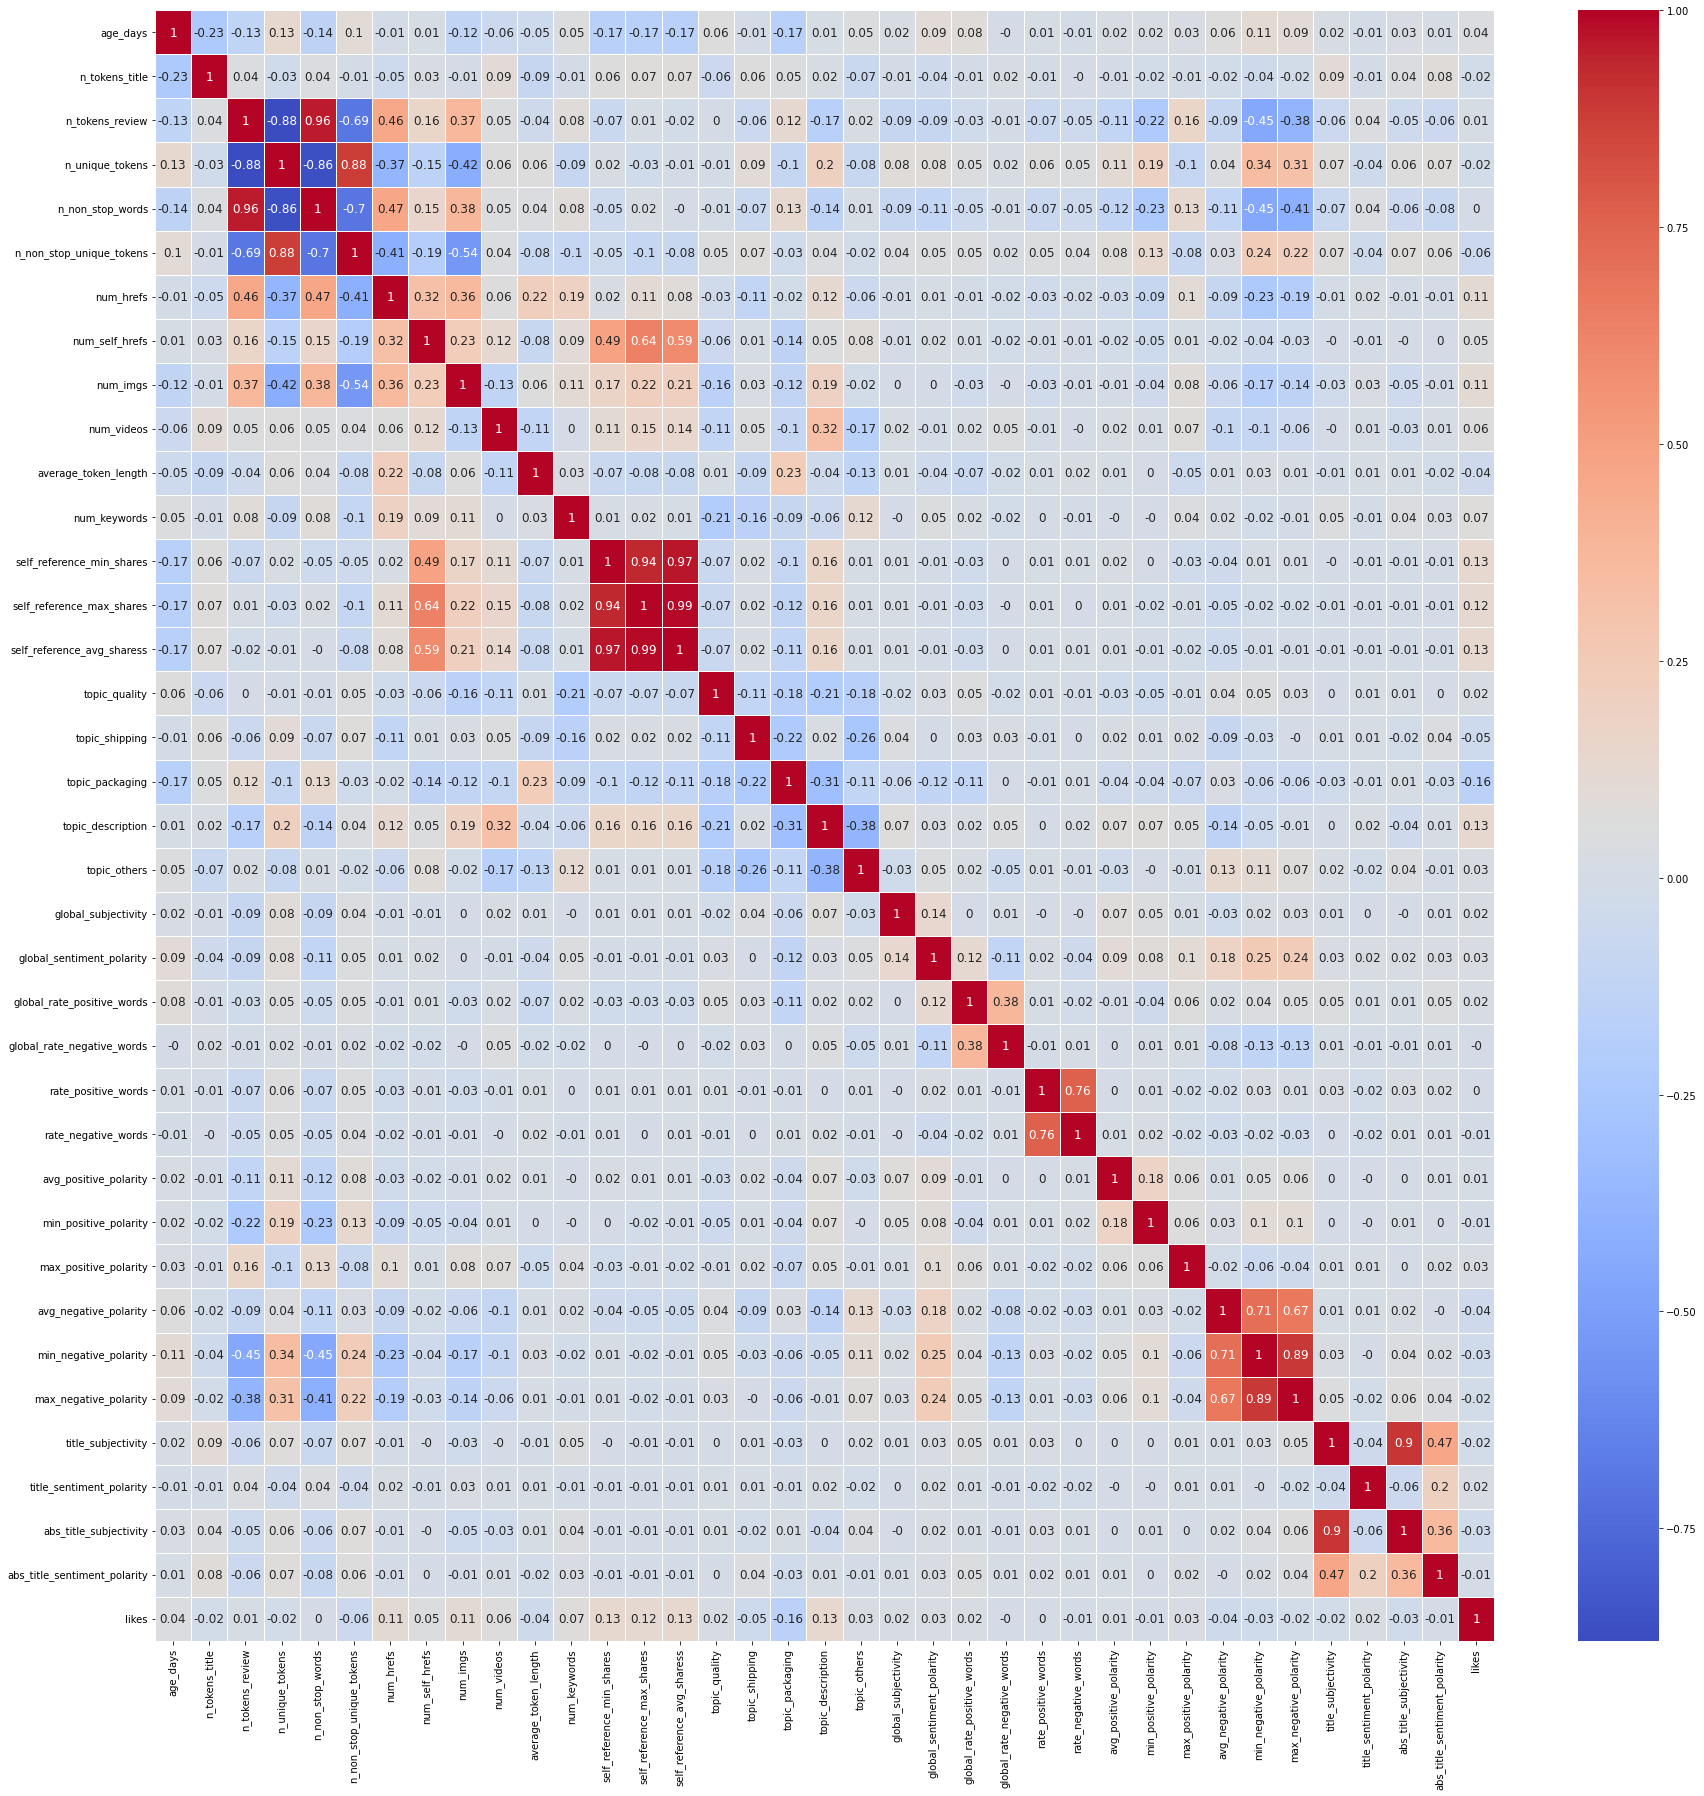

In [31]:
#To better visualization of the correlation,a heatmap in Seaborn has been used.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (30,30))
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

import winsound
duration = 1000  # milliseconds
freq = 250  # Hz
winsound.Beep(freq, duration)

In [32]:
#Drop correlated variables
df = df.drop(columns=['self_reference_min_shares',
                      'self_reference_max_shares',
                      'n_tokens_review',
                      'n_non_stop_words',
                      'n_non_stop_unique_tokens',
                      'n_non_stop_words',
                      'rate_negative_words',
                      'min_negative_polarity',
                      'title_subjectivity'])

In [33]:
#Drop data with objective type
#df1=df.drop(columns=['product_category', 'day'])
df1=df.drop(columns=['product_category', 'day', 'likes'])
df1

,age_days,n_tokens_title,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_avg_sharess,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,436,9,0.462264,0.903090,0.903090,0.301030,0.000000,4.785714,10,3.961469,...,0.025963,0.750000,0.059292,0.023465,0.114287,-0.393339,-0.832485,0.500000,0.000000,0.176091
1,185,16,0.446247,0.698970,0.477121,0.602060,1.079181,4.387352,5,3.301247,...,0.040932,0.647059,0.070917,0.017615,0.106787,-0.625800,-0.978328,-75.000000,0.161368,1.880814
2,210,12,0.546559,0.954243,0.602060,0.477121,0.301030,4.974308,7,3.596707,...,0.072681,0.407407,0.030136,0.009106,0.070441,-0.587596,-0.973823,0.000000,0.176091,0.000000
3,723,11,0.543933,0.778151,0.698970,0.301030,0.301030,4.912863,3,3.176381,...,0.000000,1.000000,0.052670,0.023465,0.090064,0.000000,0.000000,0.000000,0.176091,0.000000
4,345,11,0.405930,1.079181,0.903090,0.301030,0.301030,4.293998,8,3.725299,...,0.042138,0.704918,0.052158,0.017615,0.114287,-0.530306,-0.975247,0.000000,0.176091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,0.455399,1.643453,0.602060,1.079181,0.000000,6.308411,8,3.342620,...,0.010759,0.857143,0.071455,0.033094,0.114287,-0.645490,-0.902641,0.000000,0.176091,0.000000
27996,428,8,0.647059,0.778151,0.602060,0.000000,0.301030,4.747573,8,3.681332,...,0.033520,0.750000,0.052330,0.017615,0.070441,-0.892223,-0.978328,0.136364,0.019305,0.055517
27997,93,11,0.535104,1.518514,1.447158,1.079181,0.301030,4.658356,6,3.638181,...,0.063697,0.552239,0.061905,0.017615,0.114287,-0.731036,-0.978328,0.000000,0.176091,0.000000
27998,90,12,0.452229,1.113943,0.000000,0.477121,0.000000,4.735618,5,0.000000,...,0.033807,0.707317,0.047949,0.017615,0.090064,-0.581808,-0.977173,0.000000,0.176091,0.000000


In [34]:
#We checked again the types of data in our dataset
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_days                      28000 non-null  int64  
 1   n_tokens_title                28000 non-null  int64  
 2   n_unique_tokens               28000 non-null  float64
 3   num_hrefs                     28000 non-null  float64
 4   num_self_hrefs                28000 non-null  float64
 5   num_imgs                      28000 non-null  float64
 6   num_videos                    28000 non-null  float64
 7   average_token_length          28000 non-null  float64
 8   num_keywords                  28000 non-null  int64  
 9   self_reference_avg_sharess    28000 non-null  float64
 10  topic_quality                 28000 non-null  float64
 11  topic_shipping                28000 non-null  float64
 12  topic_packaging               28000 non-null  float64
 13  t

In [35]:
#Dataset scaling
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(copy=False) 
scaler2.fit(df1) 

#We are saving this scaler to use it later for the prediction dataset.
import pickle
pickle.dump(scaler2, open('scaler.pkl','wb'))

scaler2.transform(df1)

array([[ 0.35578406, -0.65494921, -0.83007409, ..., -0.02245506,
        -0.52255103,  0.11985503],
       [-0.82508626,  2.66803091, -0.98640323, ..., -1.49840365,
        -0.05195032,  4.33680365],
       [-0.7074697 ,  0.76918513, -0.00732617, ..., -0.03222956,
        -0.00901259, -0.31573954],
       ...,
       [-1.25791523,  0.29447368, -0.11912502, ..., -0.03222956,
        -0.00901259, -0.31573954],
       [-1.27202922,  0.76918513, -0.92801817, ..., -0.03222956,
        -0.00901259, -0.31573954],
       [ 1.50842642,  1.24389657, -1.60678724, ..., -0.03089667,
        -0.26317038, -0.24488034]])

In [36]:
df1_scaled=pd.DataFrame(scaler2.transform(df1))
df1_scaled.columns=df1.columns
df1_scaled

,age_days,n_tokens_title,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_avg_sharess,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.355784,-0.654949,-0.830074,-0.197283,1.249329,-0.453594,-0.577692,0.339716,1.456826,0.723097,...,-0.243458,-0.181944,-0.054188,0.162605,0.480222,0.745186,0.287553,-0.022455,-0.522551,0.119855
1,-0.825086,2.668031,-0.986403,-0.843768,-0.218602,0.265859,3.045783,-1.063858,-1.155143,0.234515,...,-0.056135,-0.182739,0.126469,-0.026897,0.265210,-0.393102,-0.457269,-1.498404,-0.051950,4.336804
2,-0.707470,0.769185,-0.007326,-0.035273,0.211950,-0.032741,0.433050,1.004200,-0.110356,0.453163,...,0.341167,-0.184591,-0.507333,-0.302470,-0.776705,-0.206028,-0.434262,-0.032230,-0.009013,-0.315740
3,1.706022,0.294474,-0.032954,-0.592986,0.545911,-0.453594,0.433050,0.787707,-2.199931,0.142110,...,-0.568363,-0.180013,-0.157106,0.162605,-0.214191,2.671249,4.539083,-0.032230,-0.009013,-0.315740
4,-0.072340,0.294474,-1.379913,0.360430,1.249329,-0.453594,0.433050,-1.392776,0.412038,0.548325,...,-0.041041,-0.182293,-0.165077,-0.026897,0.480222,0.074503,-0.441533,-0.032230,-0.009013,-0.315740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.569587,-0.654949,-0.897080,2.147581,0.211950,1.406164,-0.577692,5.704722,0.412038,0.265132,...,-0.433720,-0.181117,0.134835,0.474478,0.480222,-0.489519,-0.070733,-0.032230,-0.009013,-0.315740
27996,0.318147,-1.129661,0.973594,-0.592986,0.211950,-1.173047,0.433050,0.205330,0.412038,0.515788,...,-0.148889,-0.181944,-0.162403,-0.026897,-0.776705,-1.697693,-0.457269,-0.029564,-0.466251,-0.178407
27997,-1.257915,0.294474,-0.119125,1.751877,3.124242,1.406164,0.433050,-0.109011,-0.632749,0.483855,...,0.228747,-0.183472,-0.013579,-0.026897,0.480222,-0.908410,-0.457269,-0.032230,-0.009013,-0.315740
27998,-1.272029,0.769185,-0.928018,0.470528,-1.862809,-0.032741,-0.577692,0.163209,-1.155143,-2.208500,...,-0.145298,-0.182274,-0.230478,-0.026897,-0.214191,-0.177687,-0.451371,-0.032230,-0.009013,-0.315740


In [37]:
df1_scaled = pd.concat([df1_scaled,df['likes']], axis = 1)
df1_scaled

,age_days,n_tokens_title,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_avg_sharess,...,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
0,0.355784,-0.654949,-0.830074,-0.197283,1.249329,-0.453594,-0.577692,0.339716,1.456826,0.723097,...,-0.181944,-0.054188,0.162605,0.480222,0.745186,0.287553,-0.022455,-0.522551,0.119855,3.342423
1,-0.825086,2.668031,-0.986403,-0.843768,-0.218602,0.265859,3.045783,-1.063858,-1.155143,0.234515,...,-0.182739,0.126469,-0.026897,0.265210,-0.393102,-0.457269,-1.498404,-0.051950,4.336804,2.911690
2,-0.707470,0.769185,-0.007326,-0.035273,0.211950,-0.032741,0.433050,1.004200,-0.110356,0.453163,...,-0.184591,-0.507333,-0.302470,-0.776705,-0.206028,-0.434262,-0.032230,-0.009013,-0.315740,3.000000
3,1.706022,0.294474,-0.032954,-0.592986,0.545911,-0.453594,0.433050,0.787707,-2.199931,0.142110,...,-0.180013,-0.157106,0.162605,-0.214191,2.671249,4.539083,-0.032230,-0.009013,-0.315740,2.819544
4,-0.072340,0.294474,-1.379913,0.360430,1.249329,-0.453594,0.433050,-1.392776,0.412038,0.548325,...,-0.182293,-0.165077,-0.026897,0.480222,0.074503,-0.441533,-0.032230,-0.009013,-0.315740,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1.569587,-0.654949,-0.897080,2.147581,0.211950,1.406164,-0.577692,5.704722,0.412038,0.265132,...,-0.181117,0.134835,0.474478,0.480222,-0.489519,-0.070733,-0.032230,-0.009013,-0.315740,3.869232
27996,0.318147,-1.129661,0.973594,-0.592986,0.211950,-1.173047,0.433050,0.205330,0.412038,0.515788,...,-0.181944,-0.162403,-0.026897,-0.776705,-1.697693,-0.457269,-0.029564,-0.466251,-0.178407,3.785330
27997,-1.257915,0.294474,-0.119125,1.751877,3.124242,1.406164,0.433050,-0.109011,-0.632749,0.483855,...,-0.183472,-0.013579,-0.026897,0.480222,-0.908410,-0.457269,-0.032230,-0.009013,-0.315740,3.079181
27998,-1.272029,0.769185,-0.928018,0.470528,-1.862809,-0.032741,-0.577692,0.163209,-1.155143,-2.208500,...,-0.182274,-0.230478,-0.026897,-0.214191,-0.177687,-0.451371,-0.032230,-0.009013,-0.315740,3.079181


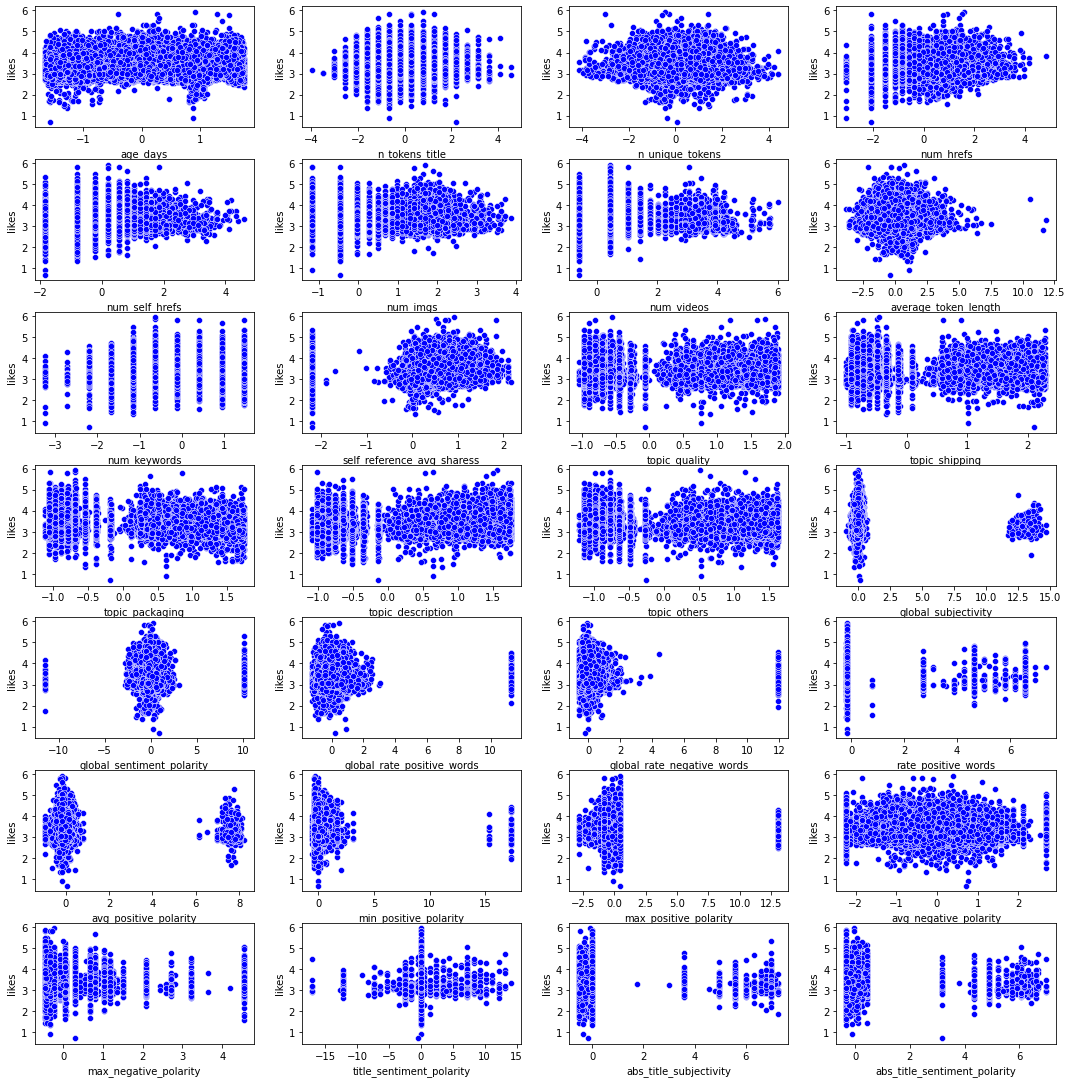

In [38]:
#To visualize the relationship between the variables and the target, scatterplots are used.
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
%matplotlib inline
import seaborn as sns
fig, axes = plt.subplots(ncols=4, nrows=7, figsize=(15,15))
fig.tight_layout()
for i, ax in zip(range(len(df1_scaled.columns)-1), axes.flat):
 sns.scatterplot(df1_scaled.iloc[:,i], y=df1_scaled.iloc[:,-1], color="blue", ax=ax)
plt.show()

<AxesSubplot:>

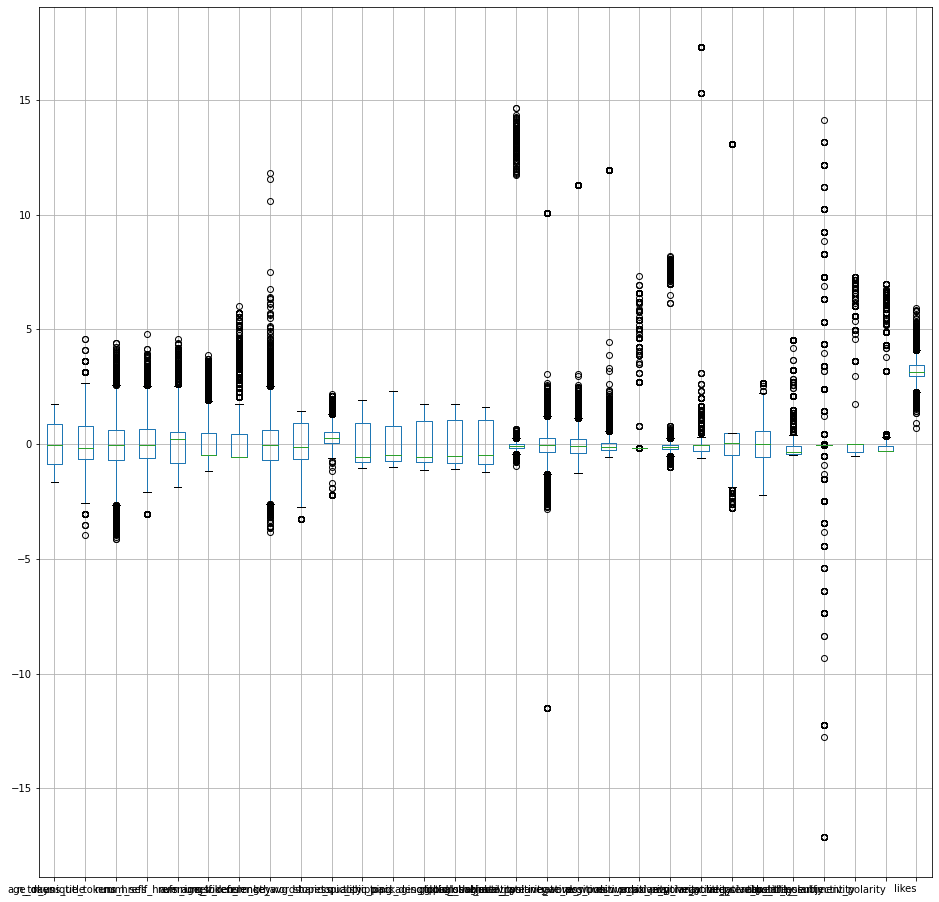

In [39]:
#Using boxplot graph we displayed the distribution of our data
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');
df1_scaled.boxplot()

In [40]:
#Dummy variables are assigned for the columns that contains categorical data.
columns=['product_category','day']
dummy_df=[]
dummy_df=pd.DataFrame(dummy_df)
for i in columns:
 dummy= pd.get_dummies(df[i],drop_first=True)
 drop_first=True #--> Whether to get k-1 dummies out of k categorical levels by removing the first level.
 dummy_df = pd.concat([dummy_df,dummy], axis = 1)

# REGRESSION MODEL

In [41]:
#Join in one table the variables of interest to perform a regression model
df4=pd.concat([dummy_df,df1_scaled], axis = 1)
df4.head()

,cleaning,entertainment,other,sport,tech,travel,monday,saturday,sunday,thursday,...,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
0,0,0,0,1,0,0,0,0,0,0,...,-0.181944,-0.054188,0.162605,0.480222,0.745186,0.287553,-0.022455,-0.522551,0.119855,3.342423
1,0,0,0,0,0,1,1,0,0,0,...,-0.182739,0.126469,-0.026897,0.265210,-0.393102,-0.457269,-1.498404,-0.051950,4.336804,2.911690
2,0,0,0,0,0,1,0,0,0,1,...,-0.184591,-0.507333,-0.302470,-0.776705,-0.206028,-0.434262,-0.032230,-0.009013,-0.315740,3.000000
3,0,0,0,0,0,1,0,0,0,0,...,-0.180013,-0.157106,0.162605,-0.214191,2.671249,4.539083,-0.032230,-0.009013,-0.315740,2.819544
4,0,0,0,0,1,0,0,0,0,0,...,-0.182293,-0.165077,-0.026897,0.480222,0.074503,-0.441533,-0.032230,-0.009013,-0.315740,3.000000


In [42]:
#Creating features and target variable
X = df4.iloc[:,:-1] #likes are included in df4
y = df.iloc[:,-1]
X

,cleaning,entertainment,other,sport,tech,travel,monday,saturday,sunday,thursday,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0,0,0,1,0,0,0,0,0,0,...,-0.243458,-0.181944,-0.054188,0.162605,0.480222,0.745186,0.287553,-0.022455,-0.522551,0.119855
1,0,0,0,0,0,1,1,0,0,0,...,-0.056135,-0.182739,0.126469,-0.026897,0.265210,-0.393102,-0.457269,-1.498404,-0.051950,4.336804
2,0,0,0,0,0,1,0,0,0,1,...,0.341167,-0.184591,-0.507333,-0.302470,-0.776705,-0.206028,-0.434262,-0.032230,-0.009013,-0.315740
3,0,0,0,0,0,1,0,0,0,0,...,-0.568363,-0.180013,-0.157106,0.162605,-0.214191,2.671249,4.539083,-0.032230,-0.009013,-0.315740
4,0,0,0,0,1,0,0,0,0,0,...,-0.041041,-0.182293,-0.165077,-0.026897,0.480222,0.074503,-0.441533,-0.032230,-0.009013,-0.315740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,1,0,0,0,0,0,0,0,...,-0.433720,-0.181117,0.134835,0.474478,0.480222,-0.489519,-0.070733,-0.032230,-0.009013,-0.315740
27996,0,0,0,0,0,0,0,0,0,0,...,-0.148889,-0.181944,-0.162403,-0.026897,-0.776705,-1.697693,-0.457269,-0.029564,-0.466251,-0.178407
27997,0,1,0,0,0,0,0,0,0,0,...,0.228747,-0.183472,-0.013579,-0.026897,0.480222,-0.908410,-0.457269,-0.032230,-0.009013,-0.315740
27998,0,0,0,0,0,1,0,0,0,0,...,-0.145298,-0.182274,-0.230478,-0.026897,-0.214191,-0.177687,-0.451371,-0.032230,-0.009013,-0.315740


In [43]:
#Split the data between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [44]:
X_train.shape

(19600, 40)

# We tried different types of regression models, here we want to report just the best one that is the GRADIENT BOOSTING

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[10,50,100], "learning_rate":[0.1,0.5,5], 
              "random_state" : [0,1] ,
             "max_depth":[1,2,5]}

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=30) 

gs = gs.fit(X_train,y_train)


#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

import winsound
duration = 1000  # milliseconds
freq = 400  # Hz
winsound.Beep(freq, duration)


***GRIDSEARCH RESULTS***
Best score: 0.156731 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}
0.044610 (0.006191) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10, 'random_state': 0}
0.044610 (0.006191) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10, 'random_state': 1}
0.094004 (0.012703) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 0}
0.094004 (0.012703) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50, 'random_state': 1}
0.113707 (0.016380) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'random_state': 0}
0.113707 (0.016380) with: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100, 'random_state': 1}
0.064093 (0.009224) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10, 'random_state': 0}
0.064093 (0.009224) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10, 'random_state': 1}
0.120824 (0.016748) with: {'learnin

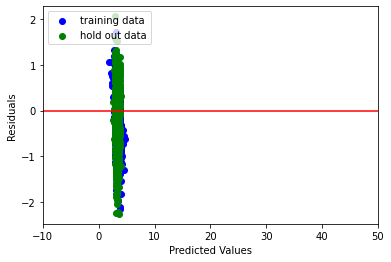

In [46]:
#Look at the residuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [47]:
from sklearn import metrics
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  0.24841536532889316
MSE train:  0.10934477259667738
RMSE train:  0.3306732111869321
r2:  0.5714495273764018
MAE test:  0.27386262757921803
MSE test:  0.13752984054114567
RMSE test:  0.370850159149414
r2:  0.39026184610353243


# Training with the Full Dataset

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 100,random_state= 0)

rg= regressor.fit(X,y)

In [49]:
from sklearn import metrics
print("MAE train: ", metrics.mean_absolute_error(y, rg.predict(X))) 
print("MSE train: ",metrics.mean_squared_error(y, rg.predict(X)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y, rg.predict(X))))
print("r2: ",np.sqrt(metrics.r2_score(y, rg.predict(X))))

MAE train:  0.2529670207725742
MSE train:  0.11453863862036094
RMSE train:  0.33843557528776574
r2:  0.5426125149481532


In [50]:
import pickle
pickle.dump(rg, open('model.pkl', 'wb'))

# Predictions

In [51]:
pred = pd.read_csv("predictions1.csv",sep=';')
pred.head()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,90,16,963,0.361976,1.0,0.412722,4,3,60,1,...,335.000000,0.100000,1.0,-0.205806,-0.5,-0.071429,0.510859,0.296591,0.010859,0.296591
1,727,13,140,0.786765,1.0,0.935897,2,1,0,0,...,0.491667,0.100000,0.8,-0.400000,-0.6,-0.200000,0.800000,-0.600000,0.300000,0.600000
2,692,8,908,0.506201,1.0,0.689091,18,10,8,0,...,0.257464,0.033333,0.6,-0.396399,-1.0,-0.100000,625.000000,-375.000000,125.000000,375.000000
3,726,11,351,0.521490,1.0,0.658654,9,6,1,0,...,0.317045,0.100000,1.0,-0.382500,-0.5,-0.300000,0.700000,0.400000,0.200000,0.400000
4,508,5,1125,0.457246,1.0,0.645551,17,12,1,1,...,0.277132,0.033333,0.6,-0.318197,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000


In [52]:
pred.describe()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,360.244800,10.38910,573.032800,0.615388,1.1041,0.758235,11.204400,3.43670,4.581300,1.274800,...,7.161968,1.221173,2.466103,-12.014642,-12.339659,-18.382073,12.330611,2.352773,5.776378,7.301435
std,213.337357,2.13067,475.074281,7.005287,10.4100,6.493827,11.178547,4.04636,8.369086,4.034317,...,53.365480,20.274710,25.048895,60.391661,84.906968,44.598960,78.077474,49.160301,37.768734,48.671912
min,9.000000,3.00000,25.000000,0.114964,1.0000,0.126335,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-875.000000,-875.000000,-875.000000,0.000000,-815.000000,0.000000,0.000000
25%,169.000000,9.00000,263.000000,0.477177,1.0000,0.632298,5.000000,1.00000,1.000000,0.000000,...,0.310488,0.050000,0.600000,-0.347446,-0.800000,-0.200000,0.000000,0.000000,0.166667,0.000000
50%,347.000000,10.00000,432.000000,0.541634,1.0000,0.694047,8.000000,3.00000,1.000000,0.000000,...,0.362036,0.100000,0.800000,-0.265823,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,548.000000,12.00000,732.000000,0.609142,1.0000,0.755236,14.000000,4.00000,4.000000,1.000000,...,0.415615,0.100000,1.000000,-0.200000,-0.388889,-0.050000,0.500000,0.150000,0.500000,0.250000
max,731.000000,23.00000,7764.000000,701.000000,1042.0000,650.000000,171.000000,116.00000,100.000000,74.000000,...,675.000000,375.000000,375.000000,0.000000,0.000000,0.000000,975.000000,675.000000,475.000000,815.000000


In [53]:
pred.info(verbose=True)
#We looked at the types of data in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_days                       10000 non-null  int64  
 1    n_tokens_title                10000 non-null  int64  
 2    n_tokens_review               10000 non-null  int64  
 3    n_unique_tokens               10000 non-null  float64
 4    n_non_stop_words              10000 non-null  float64
 5    n_non_stop_unique_tokens      10000 non-null  float64
 6    num_hrefs                     10000 non-null  int64  
 7    num_self_hrefs                10000 non-null  int64  
 8    num_imgs                      10000 non-null  int64  
 9    num_videos                    10000 non-null  int64  
 10   average_token_length          10000 non-null  float64
 11   num_keywords                  10000 non-null  int64  
 12  product_category               10000 non-null  

In [54]:
df.isna().sum() 
#Count the number of null cells, there are no null cells

age_days                        0
n_tokens_title                  0
n_unique_tokens                 0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
product_category                0
self_reference_avg_sharess      0
day                             0
topic_quality                   0
topic_shipping                  0
topic_packaging                 0
topic_description               0
topic_others                    0
global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
avg_positive_polarity           0
min_positive_polarity           0
max_positive_polarity           0
avg_negative_polarity           0
max_negative_polarity           0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sent

In [55]:
pred.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],
      dtype='object')

In [56]:
#We have eliminated the space before the name of the variables
pred.columns=pred.columns.str.replace(" ","")
pred.columns

Index(['age_days', 'n_tokens_title', 'n_tokens_review', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'product_category', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [57]:
#Drop correlated variables
pred = pred.drop(columns=['self_reference_min_shares',
                      'self_reference_max_shares',
                      'n_tokens_review',
                      'n_non_stop_words',
                      'n_non_stop_unique_tokens',
                      'n_non_stop_words',
                      'rate_negative_words',
                      'min_negative_polarity',
                      'title_subjectivity'])

In [58]:
pred.info(verbose=True)
#We looked at the types of data in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_days                      10000 non-null  int64  
 1   n_tokens_title                10000 non-null  int64  
 2   n_unique_tokens               10000 non-null  float64
 3   num_hrefs                     10000 non-null  int64  
 4   num_self_hrefs                10000 non-null  int64  
 5   num_imgs                      10000 non-null  int64  
 6   num_videos                    10000 non-null  int64  
 7   average_token_length          10000 non-null  float64
 8   num_keywords                  10000 non-null  int64  
 9   product_category              10000 non-null  object 
 10  self_reference_avg_sharess    10000 non-null  float64
 11  day                           10000 non-null  object 
 12  topic_quality                 10000 non-null  float64
 13  to

In [59]:
# Looked at the distribution plots in excel we decided to transform our variables with different types of tranformations
# to get normal distribuited variables
import math
#pred.n_tokens_review = [math.log10(x) for x in pred.n_tokens_review]
#pred.n_non_stop_words = [math.asin(math.sqrt(x)) for x in pred.n_non_stop_words]
pred.num_hrefs = [math.log10(x+1) for x in pred.num_hrefs]
pred.num_self_hrefs = [math.log10(x+1) for x in pred.num_self_hrefs]
pred.num_imgs = [math.log10(x+1) for x in pred.num_imgs]
pred.num_videos = [math.log10(x+1) for x in pred.num_videos]
#pred.self_reference_min_shares = [math.log10(x+1) for x in pred.self_reference_min_shares]
#pred.self_reference_max_shares = [math.log10(x+1) for x in pred.self_reference_max_shares]
pred.self_reference_avg_sharess = [math.log10(x+1) for x in pred.self_reference_avg_sharess]
pred.topic_quality = [math.log10(x) for x in pred.topic_quality]
pred.topic_shipping= [math.log10(x) for x in pred.topic_shipping]
pred.topic_packaging= [math.log10(x) for x in pred.topic_packaging]
pred.topic_description= [math.log10(x) for x in pred.topic_description]
pred.topic_others= [math.log10(x) for x in pred.topic_others]
pred.global_subjectivity= [math.log10(x+1) for x in pred.global_subjectivity]
pred.global_sentiment_polarity= [1-2/(1+math.exp(x)) for x in pred.global_sentiment_polarity]
pred.global_rate_positive_words= [1-2/(1+10**(2*x)) for x in pred.global_rate_positive_words]
pred.global_rate_negative_words= [1-2/(1+10**(2*x)) for x in pred.global_rate_negative_words]
pred.avg_positive_polarity= [math.log10(1+math.log10(1+x)) for x in pred.avg_positive_polarity]
pred.min_positive_polarity= [math.log10(1+math.log10(1+x)) for x in pred.min_positive_polarity]
pred.max_positive_polarity= [math.log10(1+math.log10(1+x)) for x in pred.max_positive_polarity]
pred.avg_negative_polarity= [1-2/(1+10**(2*x)) for x in pred.avg_negative_polarity]
#pred.min_negative_polarity= [1-2/(1+10**(2*x)) for x in pred.min_negative_polarity]
pred.max_negative_polarity= [1-2/(1+10**(2*x)) for x in pred.max_negative_polarity]
#pred.title_subjectivity= [math.log10(x+1) for x in pred.title_subjectivity]
pred.abs_title_subjectivity= [math.log10(x+1) for x in pred.abs_title_subjectivity]
pred.abs_title_sentiment_polarity= [math.log10(x+1) for x in pred.abs_title_sentiment_polarity]

In [60]:
#Drop data with objective type
pred_to_scale=pred.drop(columns=['product_category', 'day'])
pred_to_scale

,age_days,n_tokens_title,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_avg_sharess,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,90,16,0.361976,0.698970,0.602060,1.785330,0.301030,4.980270,7,3.019808,...,0.045399,0.746667,0.547324,0.017615,0.114287,-0.441334,-0.163003,0.296591,0.004690,0.112803
1,727,13,0.786765,0.477121,0.301030,0.000000,0.000000,4.207143,10,3.431525,...,0.032882,0.750000,0.069547,0.017615,0.098738,-0.726386,-0.430506,-0.600000,0.113943,0.204120
2,692,8,0.506201,1.278754,1.041393,0.954243,0.000000,4.803965,9,4.515887,...,0.068362,0.557377,0.041194,0.006141,0.080670,-0.722446,-0.226274,-375.000000,2.100371,2.575188
3,726,11,0.521490,1.000000,0.845098,0.301030,0.000000,4.626781,6,3.230704,...,0.032789,0.782609,0.049063,0.017615,0.114287,-0.706789,-0.598480,0.400000,0.079181,0.146128
4,508,5,0.457246,1.255273,1.113943,0.301030,0.301030,4.588444,9,3.513587,...,0.028647,0.725490,0.043848,0.006141,0.080670,-0.624700,-0.114623,0.000000,0.176091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,206,10,0.686567,0.477121,0.301030,0.000000,0.301030,4.517986,5,3.041787,...,0.049655,0.500000,0.064970,0.040171,0.080670,-0.818182,-0.726386,0.000000,0.176091,0.000000
9996,10,7,0.492578,1.041393,0.954243,0.778151,0.000000,5.110092,8,3.503019,...,0.027154,0.756757,0.050877,0.009106,0.098738,-0.643621,-1.000000,0.000000,0.176091,0.000000
9997,457,10,0.448675,1.278754,0.477121,1.230449,0.000000,4.867421,9,3.136879,...,0.031634,0.701754,0.061675,0.009106,0.114287,-0.328256,-1.000000,0.136364,0.019305,0.055517
9998,674,10,0.495908,0.845098,0.778151,0.000000,1.255273,4.501582,10,3.311966,...,0.021857,0.800000,0.058073,0.006141,0.102835,-0.506138,-1.000000,0.000000,0.176091,0.000000


In [61]:
import pickle
# load scaler modand el
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [62]:
pred_scaled= pd.DataFrame(loaded_scaler.transform(pred_to_scale))
pred_scaled.columns = pred_to_scale.columns
pred_scaled

,age_days,n_tokens_title,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,self_reference_avg_sharess,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-1.272029,2.668031,-1.808922,-0.843768,0.211950,3.093839,0.433050,1.025205,-0.110356,0.026242,...,-0.000240,-0.181970,7.530624,-0.026897,0.480222,0.510171,3.706620,-0.026432,-0.508872,-0.036700
1,1.724841,1.243897,2.337179,-1.546403,-0.825430,-1.173047,-0.577692,-1.698798,1.456826,0.330923,...,-0.156873,-0.181944,0.105179,-0.026897,0.034476,-0.885643,2.340477,-0.043959,-0.190256,0.189189
2,1.560178,-1.129661,-0.401236,0.992512,1.725934,1.107564,-0.577692,0.404019,0.934432,1.133382,...,0.287125,-0.183432,-0.335476,-0.398514,-0.483481,-0.866350,3.383496,-7.363100,5.602801,6.054468
3,1.720136,0.294474,-0.252007,0.109649,1.049483,-0.453594,-0.577692,-0.220264,-0.632749,0.182311,...,-0.158045,-0.181692,-0.213168,-0.026897,0.480222,-0.789683,1.482626,-0.024410,-0.291633,0.045735
4,0.694520,-2.553795,-0.879056,0.918143,1.975951,-0.453594,0.433050,-0.355336,0.934432,0.391652,...,-0.209878,-0.182134,-0.294225,-0.398514,-0.483481,-0.387717,3.953698,-0.032230,-0.009013,-0.315740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.726288,-0.180238,1.359211,-1.546403,-0.825430,-1.173047,0.433050,-0.603588,-1.155143,0.042507,...,0.053025,-0.183875,0.034047,0.703681,-0.483481,-1.335138,0.829405,-0.032230,-0.009013,-0.315740
9996,-1.648402,-1.604372,-0.534203,0.240747,1.425606,0.686712,-0.577692,1.482614,0.412038,0.383831,...,-0.228562,-0.181892,-0.184981,-0.302470,0.034476,-0.480365,-0.567950,-0.032230,-0.009013,-0.315740
9997,0.454582,-0.180238,-0.962705,0.992512,-0.218602,1.767690,-0.577692,0.627599,0.934432,0.112878,...,-0.172497,-0.182317,-0.017166,-0.302470,0.480222,1.063877,-0.567950,-0.029564,-0.466251,-0.178407
9998,1.475494,-0.180238,-0.501694,-0.380954,0.818778,-1.173047,3.637030,-0.661383,1.456826,0.242447,...,-0.294849,-0.181558,-0.073140,-0.398514,0.151936,0.192845,-0.567950,-0.032230,-0.009013,-0.315740


In [63]:
#Dummy variables are assigned for the columns that contains categorical data.
columns=['product_category','day']
dummy_pred=[]
dummy_pred=pd.DataFrame(dummy_pred)
for i in columns:
 dummy= pd.get_dummies(pred[i],drop_first=True)
 drop_first=True #--> Whether to get k-1 dummies out of k categorical levels by removing the first level.
 dummy_pred = pd.concat([dummy_pred,dummy], axis = 1)

In [64]:
#Join in one table the variables of interest to perform a regression model
pred1=pd.concat([dummy_pred,pred_scaled], axis = 1)
pred1.head()

,cleaning,entertainment,other,sport,tech,travel,monday,saturday,sunday,thursday,...,global_rate_negative_words,rate_positive_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0,1,0,0,0,0,0,0,0,0,...,-0.000240,-0.181970,7.530624,-0.026897,0.480222,0.510171,3.706620,-0.026432,-0.508872,-0.036700
1,0,1,0,0,0,0,0,0,0,0,...,-0.156873,-0.181944,0.105179,-0.026897,0.034476,-0.885643,2.340477,-0.043959,-0.190256,0.189189
2,0,0,0,0,0,1,0,0,0,0,...,0.287125,-0.183432,-0.335476,-0.398514,-0.483481,-0.866350,3.383496,-7.363100,5.602801,6.054468
3,0,0,0,0,1,0,0,1,0,0,...,-0.158045,-0.181692,-0.213168,-0.026897,0.480222,-0.789683,1.482626,-0.024410,-0.291633,0.045735
4,0,1,0,0,0,0,0,0,1,0,...,-0.209878,-0.182134,-0.294225,-0.398514,-0.483481,-0.387717,3.953698,-0.032230,-0.009013,-0.315740


In [65]:
y_final_pred = loaded_model.predict(pred1)

In [66]:
y_final_pred.shape

(10000,)

In [67]:
predictions=pd.DataFrame()

predictions['target']=y_final_pred

In [68]:
predictions

,target
0,3.139925
1,3.190403
2,3.319744
3,3.479323
4,3.296667
...,...
9995,3.149970
9996,3.130952
9997,3.109002
9998,3.229574


In [69]:
predictions.target= [10**x for x in predictions.target]

In [70]:
predictions

,target
0,1380.144728
1,1550.253731
2,2088.064070
3,3015.248116
4,1980.006534
...,...
9995,1412.438834
9996,1351.924211
9997,1285.293855
9998,1696.578275


In [1]:
predictions.to_csv("RegressionProject.csv", index = False)  

NameError: name 'predictions' is not defined